#Facebook Marketplace Dataset

###Import the libraries and load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (Ensure you've uploaded 'Facebook_Marketplace_data.csv' to Colab)
df = pd.read_csv("Facebook_Marketplace_data.csv")

# Display basic info and first few rows
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


##1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

###The engagement level of a post is influenced by the time it is published. Generally:

### 1.Posts made during peak hours (evenings, weekends) tend to receive more reactions.
### 2.Posts made in the early morning or late night tend to receive fewer reactions.
###To analyze this, the status_published column needs to be converted into hours and then plotted against num_reactions to observe trends.

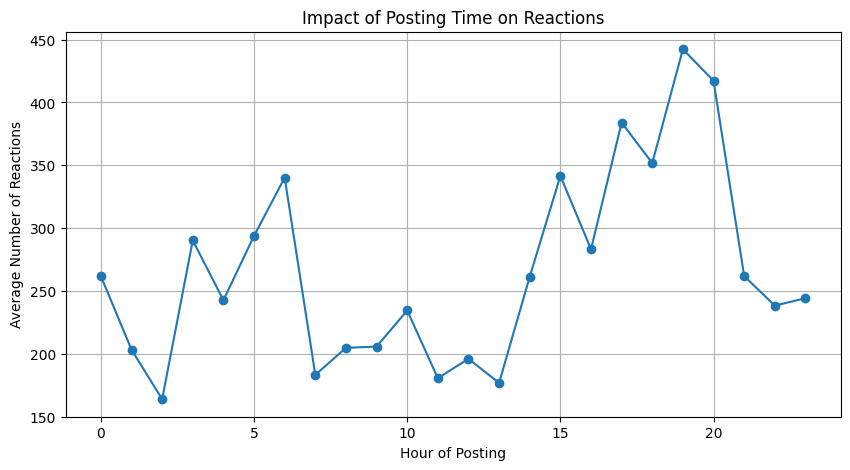

In [4]:
# Convert 'status_published' to datetime
df['status_published'] = pd.to_datetime(df['status_published'])

# Extract hour of posting
df['hour'] = df['status_published'].dt.hour

# Group by hour and calculate average reactions
hourly_reactions = df.groupby('hour')['num_reactions'].mean()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(hourly_reactions.index, hourly_reactions.values, marker='o', linestyle='-')
plt.xlabel('Hour of Posting')
plt.ylabel('Average Number of Reactions')
plt.title('Impact of Posting Time on Reactions')
plt.grid()
plt.show()


##2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

###A correlation analysis helps determine whether posts that receive more reactions also get more comments and shares. The Pearson correlation coefficient will indicate the strength and direction of this relationship:

###+1 → Strong positive correlation
###0 → No correlation
###-1 → Strong negative correlation

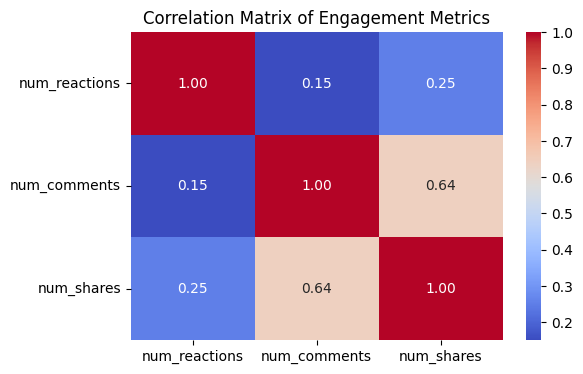

In [5]:
# Calculate correlation matrix
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()


##3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

###K-Means is an unsupervised learning algorithm that groups posts into clusters based on engagement levels.

Cluster
0    6405
2     372
1     273
Name: count, dtype: int64


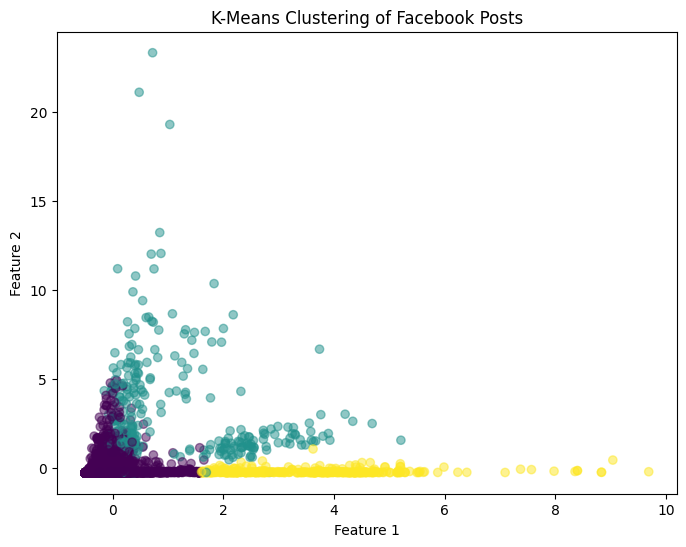

In [6]:
# Select features for clustering
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
            'num_hahas', 'num_sads', 'num_angrys']
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster counts
print(df['Cluster'].value_counts())

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering of Facebook Posts')
plt.show()


##4.	Use the elbow method to find the optimum number of clusters.

###The elbow method helps determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS).

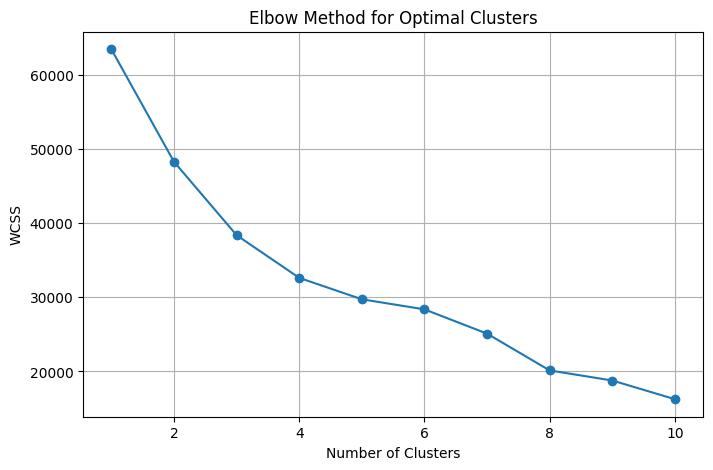

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.show()


##5.	What is the count of different types of posts in the dataset?

###The dataset contains different types of posts (status_type column). Below is the frequency count of each type.

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


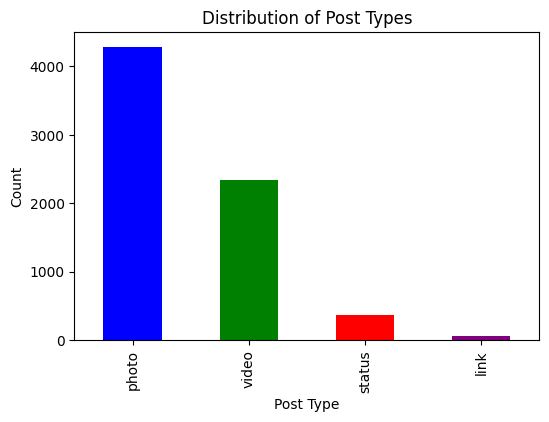

In [8]:
# Count post types
post_counts = df['status_type'].value_counts()
print(post_counts)

# Plot post type distribution
plt.figure(figsize=(6, 4))
post_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.title('Distribution of Post Types')
plt.show()


##6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

###To analyze the engagement of each post type, we compute the average reactions, comments, and shares.



             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


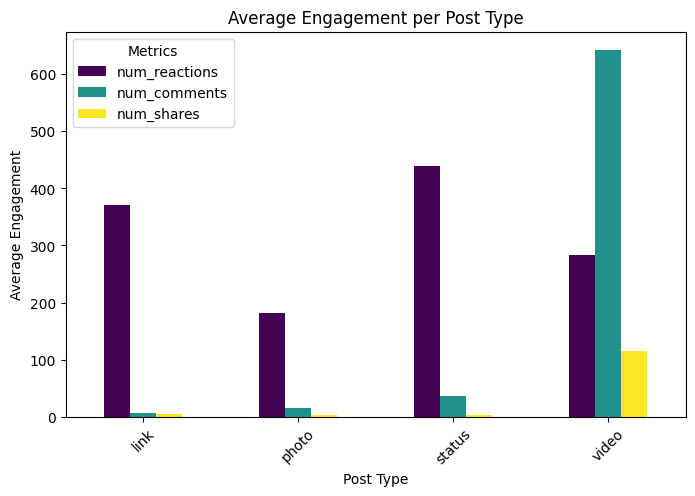

In [9]:
# Compute averages for each post type
avg_engagement = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Display results
print(avg_engagement)

# Plot results
avg_engagement.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.xlabel('Post Type')
plt.ylabel('Average Engagement')
plt.title('Average Engagement per Post Type')
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.show()


#Sales Prediction Dataset Analysis

###Import the libraries and load the Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (Ensure you've uploaded 'advertising_sales_data.xlsx' to Colab)
df = pd.read_excel("advertising_sales_data.xlsx")

# Drop the 'Campaign' column as it is non-numeric
df = df.drop(columns=['Campaign'])

# Display basic info and first few rows
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##1.	What is the average amount spent on TV advertising in the dataset?

In [7]:
# Calculate average TV ad expenditure
average_tv_spend = df["TV"].mean()
print(f"Average TV advertising expenditure: ${average_tv_spend:.2f}")


Average TV advertising expenditure: $147.04


##2.	What is the correlation between radio advertising expenditure and product sales?

###This determines if radio advertising is strongly linked to product sales.

Correlation between Radio advertising and Sales: 0.35


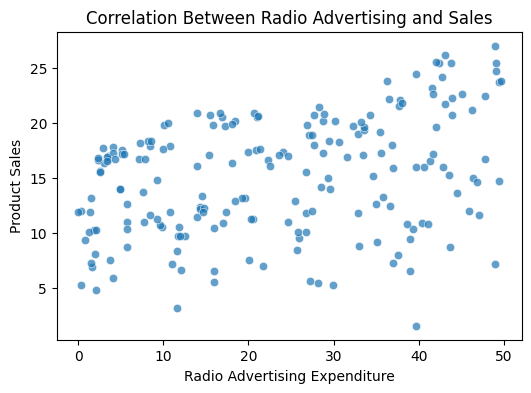

In [8]:
# Compute correlation
correlation_radio_sales = df["Radio"].corr(df["Sales"])
print(f"Correlation between Radio advertising and Sales: {correlation_radio_sales:.2f}")

# Plot correlation visually
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Radio"], y=df["Sales"], alpha=0.7)
plt.xlabel("Radio Advertising Expenditure")
plt.ylabel("Product Sales")
plt.title("Correlation Between Radio Advertising and Sales")
plt.show()


##3.	Which advertising medium has the highest impact on sales based on the dataset?

###This is determined using the correlation matrix.

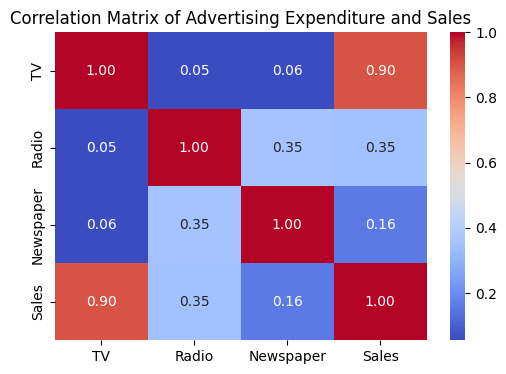

In [9]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Advertising Expenditure and Sales")
plt.show()


###The highest correlation coefficient with Sales indicates the most impactful advertising medium.

In [11]:
# Check for missing values in each column
print(df.isnull().sum())

# Display rows with missing values
print(df[df.isnull().any(axis=1)])


TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64
        TV  Radio  Newspaper  Sales
19   147.3    NaN       19.1   14.6
152  197.6    NaN       14.2   16.6


In [12]:
# Fill missing values in "Radio" with the column's mean
df["Radio"].fillna(df["Radio"].mean(), inplace=True)

# Verify that missing values are handled
print(df.isnull().sum())  # Should show 0 NaN values


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


<ipython-input-12-2ca94de9d446>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Radio"].fillna(df["Radio"].mean(), inplace=True)


##4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

###We build a linear regression model using all three advertising mediums.

Mean Squared Error: 2.91
R-squared (R²) Score: 0.91


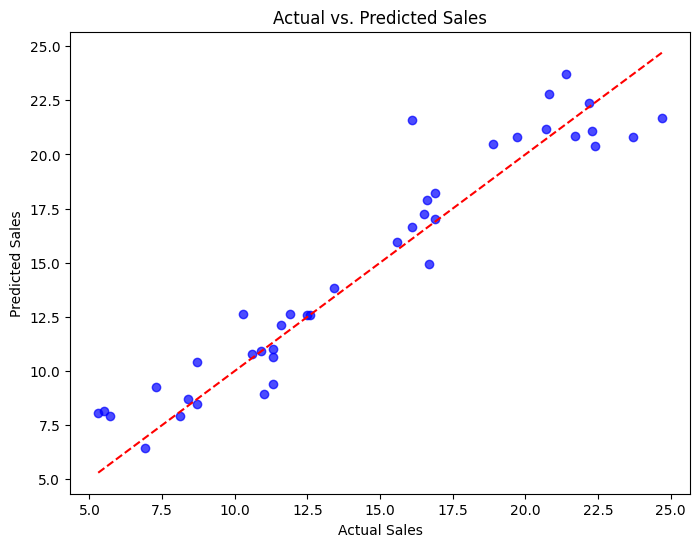

In [13]:
# Define features (TV, Radio, Newspaper) and target (Sales)
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

# Plot actual vs predicted sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


###The red dashed line represents perfect predictions. The closer the scatter points are to this line, the better the model.

##5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

###We predict sales when TV = $200, Radio = $40, and Newspaper = $50.

In [14]:
# Define new data point
new_data = np.array([[200, 40, 50]])

# Predict sales
predicted_sales = model.predict(new_data)[0]
print(f"Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: {predicted_sales:.2f}")


Predicted Sales for TV=$200, Radio=$40, Newspaper=$50: 19.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##6.	How does the performance of the linear regression model change when the dataset is normalized?

###Normalization scales data to improve model performance.

In [15]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"After Normalization - Mean Squared Error: {mse_scaled:.2f}")
print(f"After Normalization - R-squared (R²) Score: {r2_scaled:.2f}")


After Normalization - Mean Squared Error: 2.91
After Normalization - R-squared (R²) Score: 0.91


##7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

###We build a new model using only Radio and Newspaper to see how sales predictions change.

In [16]:
# Define new features (Radio, Newspaper)
X_subset = df[["Radio", "Newspaper"]]

# Split dataset
X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Train model
model_subset = LinearRegression()
model_subset.fit(X_train_subset, y_train)

# Predict
y_pred_subset = model_subset.predict(X_test_subset)

# Evaluate model
mse_subset = mean_squared_error(y_test, y_pred_subset)
r2_subset = r2_score(y_test, y_pred_subset)

print(f"Using Only Radio & Newspaper - Mean Squared Error: {mse_subset:.2f}")
print(f"Using Only Radio & Newspaper - R-squared (R²) Score: {r2_subset:.2f}")


Using Only Radio & Newspaper - Mean Squared Error: 27.50
Using Only Radio & Newspaper - R-squared (R²) Score: 0.11
